#### Am noting that the decline in water vapor intensity is not being preserved in predictions from successive calibration data.  

**Want to know how to get better model fidelity. ***

All this comes from http://austinrochford.com/posts/2015-08-29-additive.html



In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import patsy
import scipy as sp
import seaborn as sns
from statsmodels import api as sm

from pygam import LinearGAM
from pygam.utils import generate_X_grid

/Users/phora/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from itertools import chain
pth = '/Users/phora/GDrive/research/ZIPP/ZIPP2_EN602/EN602_Loose/science/UMS/MS Data/'

massspec_12_1 = pd.read_table(pth+'MSData_7_12_2017 21_08.dfData',sep='\t',parse_dates=[0], header=0, low_memory=False)
massspec_12_1.dropna(axis=0, how='all')
ms = massspec_12_1.iloc[5858:9895, :]



In [3]:
hdrs = ms.columns.values
idx = [62,5]
ms = ms.dropna(how='any')
#print(hdrs[idx])

In [4]:
df = pd.DataFrame(ms[hdrs[idx]])
target_df = pd.Series(ms[hdrs[64]])


In [5]:
### Add scaling values
s18 = 1e-9
s32 = 1e-10


In [6]:
X = df
y = target_df

### Make a division between test and train data:
#from sklearn.model_selection import train_test_split
X_train = X
y_train = y

lam = [0.1]
#lam = [0.01,0.01,1,0.01,1,1]
#lam = [1,1,1,1,1,1]
#gam = LinearGAM(n_splines=5,lam=lam,penalties='derivative').fit(X_train, y_train)
gam = LinearGAM(n_splines=10).gridsearch(X, y)

gam.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/phora/anaconda2/lib/python2.7/site-packages/pygam/utils.py:69: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)
100% (11 of 11) |#########################| Elapsed Time: 0:00:00 Time: 0:00:00


Model Statistics
----------------------------
edof                   8.478
AIC              -215862.042
AICc             -215861.992
GCV                      0.0
loglikelihood     107940.499
deviance            4010.522
scale                    0.0

Pseudo-R^2
----------------------------
explained_deviance     0.929
McFadden              -0.322
McFadden_adj          -0.322


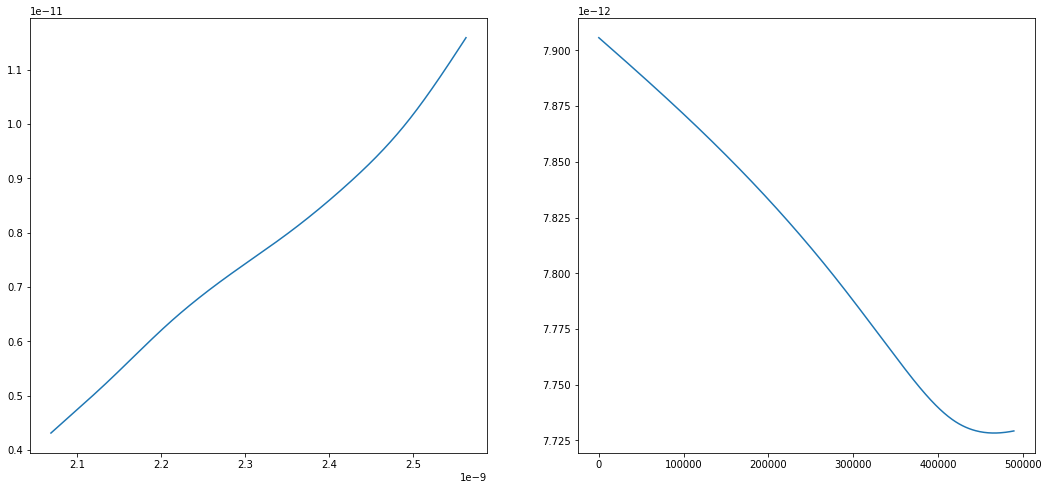

In [95]:
XX = generate_X_grid(gam)
plt.rcParams['figure.figsize'] = (18, 8)
fig, axs = plt.subplots(1, len(hdrs[idx]))
titles = hdrs[idx]
for i, ax in enumerate(axs):
    pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    #ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    #ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    #ax.set_title(titles[i],fontsize=12)
plt.show()

In [89]:
pdep

array([[ 0.05025749],
       [ 0.05039974],
       [ 0.05054157],
       [ 0.05068299],
       [ 0.05082402],
       [ 0.05096467],
       [ 0.05110495],
       [ 0.05124488],
       [ 0.05138446],
       [ 0.05152372],
       [ 0.05166266],
       [ 0.0518013 ],
       [ 0.05193965],
       [ 0.05207772],
       [ 0.05221552],
       [ 0.05235307],
       [ 0.05249039],
       [ 0.05262748],
       [ 0.05276435],
       [ 0.05290102],
       [ 0.05303751],
       [ 0.05317382],
       [ 0.05330997],
       [ 0.05344597],
       [ 0.05358184],
       [ 0.05371758],
       [ 0.05385321],
       [ 0.05398874],
       [ 0.05412419],
       [ 0.05425957],
       [ 0.05439488],
       [ 0.05453015],
       [ 0.05466539],
       [ 0.05480061],
       [ 0.05493581],
       [ 0.05507103],
       [ 0.05520626],
       [ 0.05534152],
       [ 0.05547682],
       [ 0.05561219],
       [ 0.05574762],
       [ 0.05588313],
       [ 0.05601874],
       [ 0.05615445],
       [ 0.05629029],
       [ 0

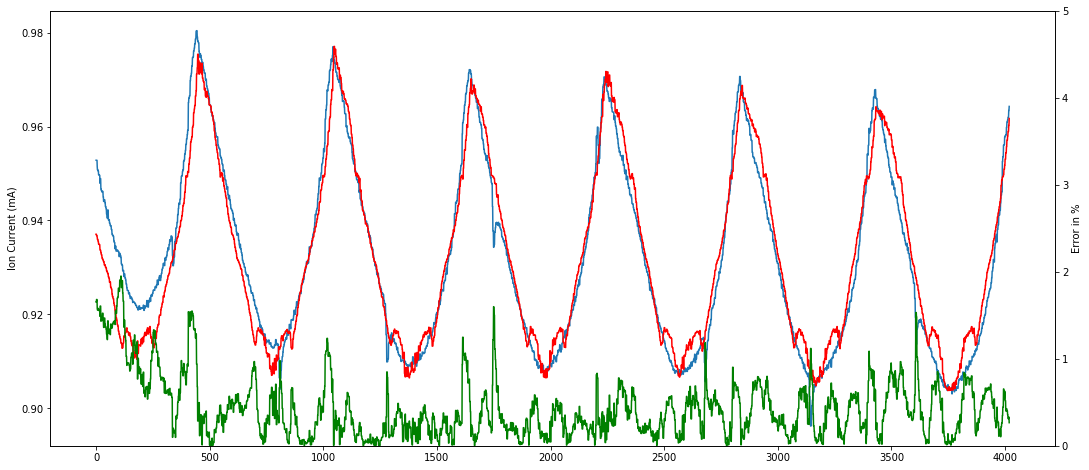

In [78]:
f1,ax = plt.subplots();

plt.plot(y.as_matrix())
yy = gam.predict(X) 
plt.plot(yy,'r')
#plt.ylim(7e-11,9e-11)
#plt.ylim(0.02,0.06)
plt.ylabel('Ion Current (mA)')
ax2 = ax.twinx()

err = np.sqrt((y.as_matrix()-yy)**2)/y.as_matrix()*100
plt.plot(err,'g')
plt.ylim(0,5)
plt.ylabel('Error in %')
plt.show()

In [68]:
#Now try to test on the next day's calibration data
#fil = 'MSData_7_14_2017 21_13.dfData'
massspec_15_1 = pd.read_table(pth+'MSData_7_15_2017 22_44.dfData',sep='\t',parse_dates=[0], header=0, low_memory=False,encoding='latin1')
mss = massspec_15_1.iloc[4064:6883, :]
mss = mss.dropna(how='any')

hdr15 = mss.columns.values

X15 = pd.DataFrame(mss[hdr15[idx]])
Y15 = pd.Series(mss[hdr15[64]])

X15 = X15/s18
Y15 = Y15/s32

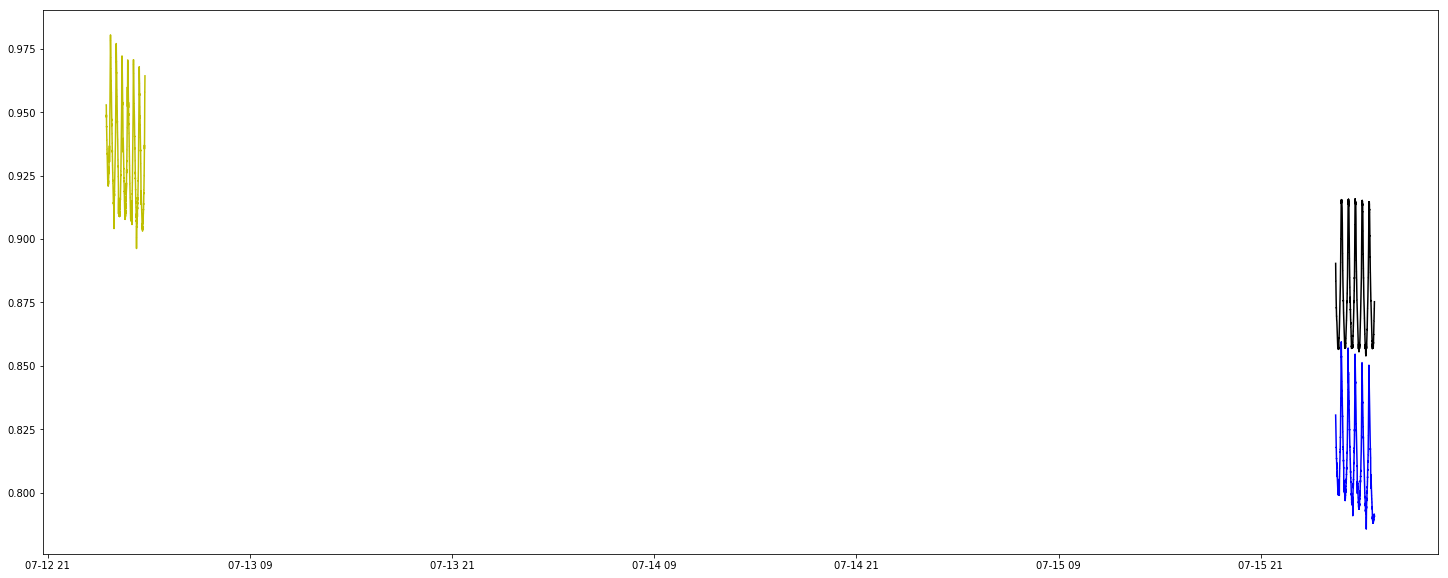

In [70]:
## Check to see if water vapor dropped as much in the subsequent cal.
f2,ax2 = plt.subplots(figsize=(25,10));


#plt.plot(mss[hdrs[0]],mss[hdrs[idx[0]]],'r')
#plt.plot(ms[hdrs[0]],ms[hdrs[idx[0]]],'g')
#plt.ylim(2e-11,13e-11)
#plt.ylim(0.01,0.1)
#plt.ylabel('Ion Current (mA)')
#ax3 = ax2.twinx()

yy15 = gam.predict(X15) 
plt.plot(mss[hdrs[0]],yy15,'k')

plt.plot(mss[hdrs[0]],Y15.as_matrix(),'b')
plt.plot(ms[hdrs[0]],ms[hdrs[64]]/s32,'y')
#err = np.sqrt((Y15.as_matrix()-yy15)**2)/Y15.as_matrix()*100
#plt.plot(err,'g')
#plt.ylim(0,50)
#plt.ylabel('Error in %')
plt.show()


In [58]:
d18 = (2.35-2.0)/2.35

dact = (9.5-8.25)/9.5

dpred = (9.5-9.0)/9.5


In [60]:
d18

0.14893617021276598

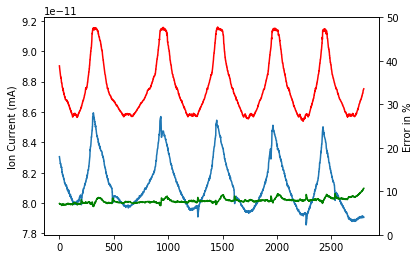

In [40]:
f2,ax2 = plt.subplots();

plt.plot(Y15.as_matrix())

yy15 = gam.predict(X15) 
plt.plot(yy15,'r')
#plt.ylim(2e-11,13e-11)
#plt.ylim(0.01,0.1)
plt.ylabel('Ion Current (mA)')
ax3 = ax2.twinx()

err = np.sqrt((Y15.as_matrix()-yy15)**2)/Y15.as_matrix()*100
plt.plot(err,'g')
plt.ylim(0,50)
plt.ylabel('Error in %')
plt.show()

In [ ]:
from scipy import signal as sig
from scipy.interpolate import griddata
import gsw

In [ ]:
#NOTES FROM SAM
#back=np.average(mass32_cal)/4.91793e-11
#corr32 = np.average(mass32_cal/cal_avg)
#conc_2=208.51120836118787
#CF = conc_2 / (corr32-back)
#cal32 = ((mass32/fitted32)-back)*CF








In [7]:
import patsy as pt

In [11]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()